# Αναγνώριση Προτύπων - Εργασία



## Μέρος A
Έχουμε 12 δείγματα, 7 από τα οποία έχουν label 'Χωρίς στρες' και ανήκουν στην κλάση $ω_1$ και τα υπόλοιπα 5 έχουν label 'Με στρες' και ανήκουν στην κλάση $ω_2$. Το x, που είναι ο δείκτης του στρες, ακολουθεί την παρακάτω κατανομή:
$$p(x|\theta) = \frac{1}{\pi}\frac{1}{{1+(x-\theta)}^2}$$

### 1. Εκτιμήστε τα $\hat{θ_1}$ and $\hat{θ_2}$ και δείξτε τα $logp(D_1|θ)$, $logp(D_2|θ)$

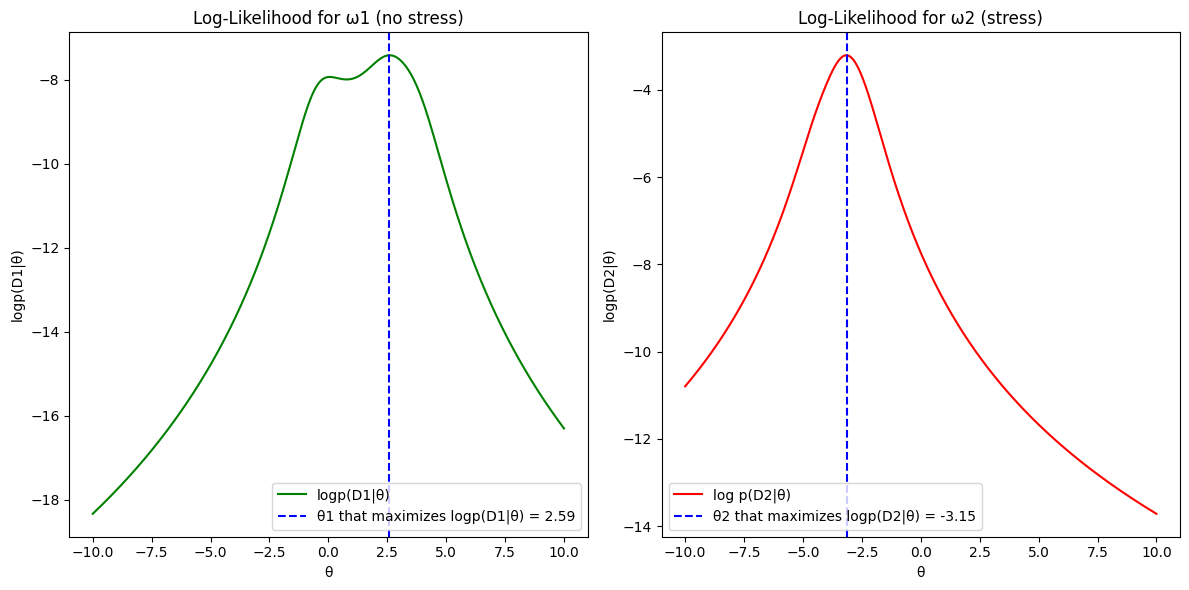

Maximum Likelihood estimation of θ1 (for class ω1 -> no stress): 2.59
Maximum Likelihood estimation of θ2 (for class ω2 -> stress): -3.15


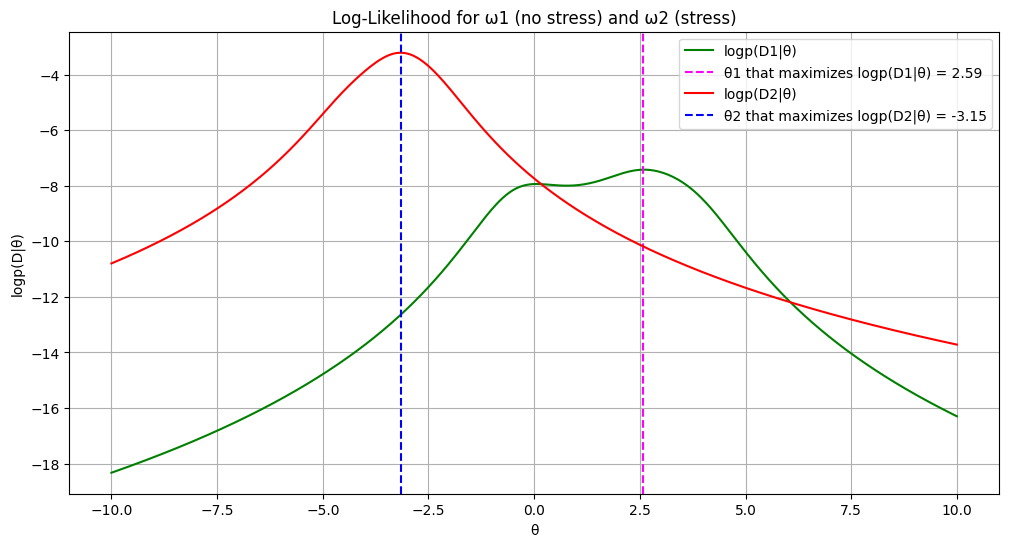

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

D1 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]  # 7 felt no stress -> class ω1
D2 = [-4.5, -3.4, -3.1, -3.0 , -2.3]         # 5 felt stress -> class ω2

#likelihood
def likelihood(data,theta):
   return (np.pi * (1 + (np.array(data)-theta)**2))

#log-likelihood: logp(x|θ) = -log(π*(1+(x-θ)^2))
def log_likelihood(data, theta):
    return np.sum(-np.log10(likelihood(data, theta)))

#choose θ in [-10,10] to plot the log-likelihoods, 500 values for smooth plot
ranging_theta = np.linspace(-10, 10, 500)
log_likelihood_D1 = [log_likelihood(D1, theta) for theta in ranging_theta]
log_likelihood_D2 = [log_likelihood(D2, theta) for theta in ranging_theta]

#find θ1 and θ2 that maximise log-likelihood
theta1_est = ranging_theta[np.argmax(log_likelihood_D1)]
theta2_est = ranging_theta[np.argmax(log_likelihood_D2)]

#plot
plt.figure(figsize=(12, 6))

#class ω1
plt.subplot(1, 2, 1)
plt.plot(ranging_theta, log_likelihood_D1, label=f"logp(D1|θ)", color="green")
plt.axvline(theta1_est, color="blue", linestyle="--", label=f"θ1 that maximizes logp(D1|θ) = {theta1_est:.2f}")
plt.title("Log-Likelihood for ω1 (no stress)")
plt.xlabel("θ")
plt.ylabel("logp(D1|θ)")
plt.legend()

#class ω2
plt.subplot(1, 2, 2)
plt.plot(ranging_theta, log_likelihood_D2, label=f"log p(D2|θ)", color="red")
plt.axvline(theta2_est, color="blue", linestyle="--", label=f"θ2 that maximizes logp(D2|θ) = {theta2_est:.2f}")
plt.title("Log-Likelihood for ω2 (stress)")
plt.xlabel("θ")
plt.ylabel("logp(D2|θ)")
plt.legend()

plt.tight_layout()
plt.show()

#results
print(f"Maximum Likelihood estimation of θ1 (for class ω1 -> no stress): {theta1_est:.2f}")
print(f"Maximum Likelihood estimation of θ2 (for class ω2 -> stress): {theta2_est:.2f}")


#log-likelihoods in the same figure
plt.figure(figsize=(12, 6))
plt.plot(ranging_theta, log_likelihood_D1, label=f"logp(D1|θ)", color="green") #class ω1
plt.axvline(theta1_est, color="magenta", linestyle="--", label=f"θ1 that maximizes logp(D1|θ) = {theta1_est:.2f}")

plt.plot(ranging_theta, log_likelihood_D2, label=f"logp(D2|θ)", color="red") #class ω2
plt.axvline(theta2_est, color="blue", linestyle="--", label=f"θ2 that maximizes logp(D2|θ) = {theta2_est:.2f}")

plt.title("Log-Likelihood for ω1 (no stress) and ω2 (stress)")
plt.xlabel("θ")
plt.ylabel("logp(D|θ)")
plt.legend()
plt.grid()
plt.show()



### 2. Ταξινομήστε τα δείγματα με τη συνάρτηση διάκρισης $$g(x) = logP(x|\hat{θ_1}) − logP(x|\hat{θ_2}) + logP(ω_1) − logP(ω_2)$$



MLE of θ1 (no stress): 2.59
MLE of θ2 (stress): -3.15
A priori P(ω1): 0.58
A priori P(ω2): 0.42


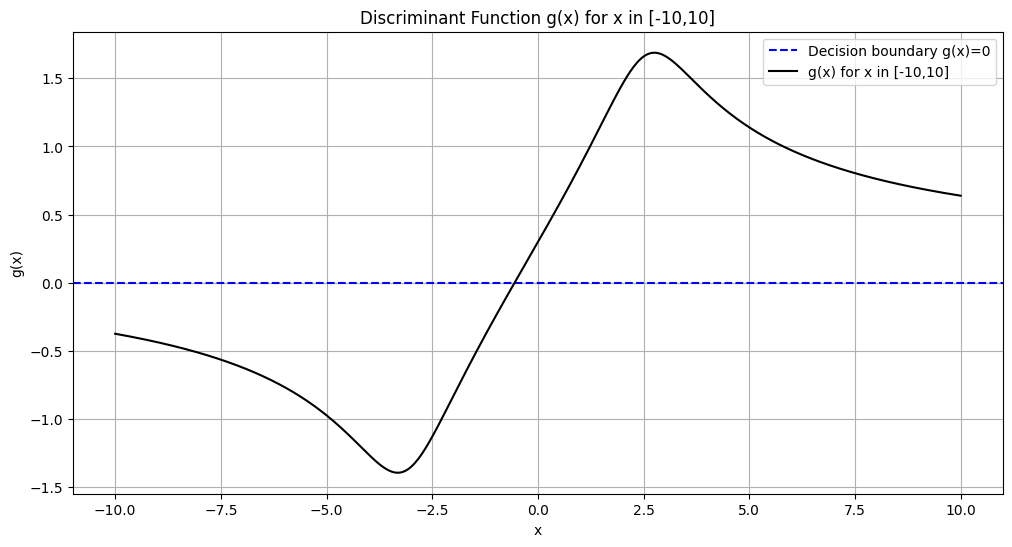

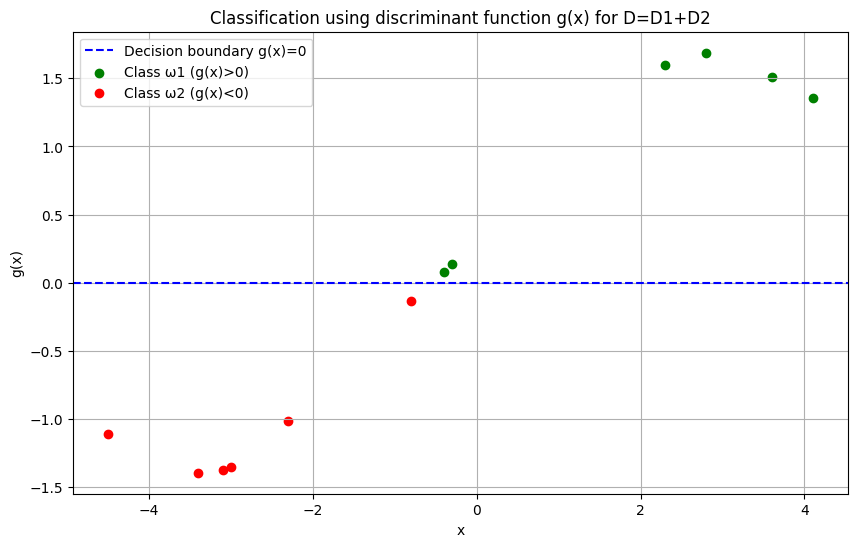

In a dataframe:
 Sample (x)  Discriminant g(x) Prediction
        2.8           1.687138         ω1
       -0.4           0.081566         ω1
       -0.8          -0.136115         ω2
        2.3           1.598775         ω1
       -0.3           0.135623         ω1
        3.6           1.506227         ω1
        4.1           1.356736         ω1
       -4.5          -1.110965         ω2
       -3.4          -1.392891         ω2
       -3.1          -1.375662         ω2
       -3.0          -1.352452         ω2
       -2.3          -1.014888         ω2


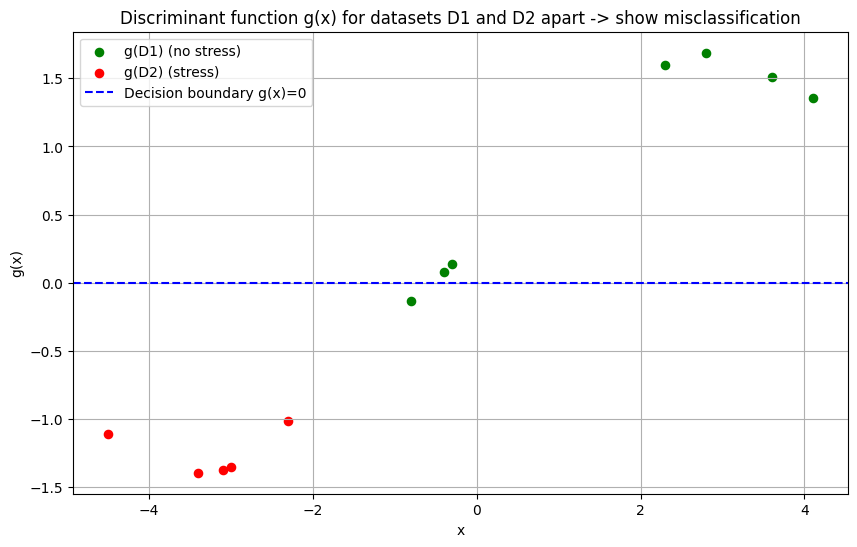

In [ ]:
import pandas as pd

class Classifier:
    def __init__(self): #constructor
        self.theta1 = None
        self.theta2 = None

    def log_likelihood(self, D, theta):
        return np.sum(-np.log10(np.pi*(1 + (np.array(D)-theta)**2)))

    def fit(self, D1, D2, ranging_theta): #training: find θ that maximises log-likelihood, θ in [-10,10]
        log_likelihood_D1 = [self.log_likelihood(D1, theta) for theta in ranging_theta]
        log_likelihood_D2 = [self.log_likelihood(D2, theta) for theta in ranging_theta]

        self.theta1 = ranging_theta[np.argmax(log_likelihood_D1)]
        self.theta2 = ranging_theta[np.argmax(log_likelihood_D2)]


    def discr_value(self, D, prior1, prior2): #discriminant g(x) = logP(x|θ1_est) − logP(x|θ2_est) + logP(ω1) − logP(ω2)
        log_p_theta1 = -np.log10(np.pi*(1 + (D-self.theta1)**2))
        log_p_theta2 = -np.log10(np.pi*(1 + (D-self.theta2)**2))
        log_prior_diff = np.log10(prior1) - np.log10(prior2)

        g = log_p_theta1 - log_p_theta2 + log_prior_diff
        return g

    def predict(self, g):
        if (g>0):
            return "ω1"
        else:
            return "ω2"


classifier = Classifier() #make object of Classifier

#train classifier
classifier.fit(D1, D2, ranging_theta)

#combine datasets D1 and D2 into 1 dataset D
D = np.array(D1+D2)

#a priori probabilities: prior1=7/12 and prior2=5/12
prior1 = len(D1)/(len(D))
prior2 = len(D2)/(len(D))

print(f"\nMLE of θ1 (no stress): {classifier.theta1:.2f}")
print(f"MLE of θ2 (stress): {classifier.theta2:.2f}")
print(f"A priori P(ω1): {prior1:.2f}")
print(f"A priori P(ω2): {prior2:.2f}")

#plot smooth g(x) for x in range [-10,10]
range_x = np.linspace(-10, 10, 500)
g_values = [classifier.discr_value(x, prior1, prior2) for x in range_x]

plt.figure(figsize=(12, 6))
plt.axhline(0, color="blue", linestyle="--", label="Decision boundary g(x)=0")
plt.plot(range_x, g_values, color="black", label="g(x) for x in [-10,10]")
plt.title("Discriminant Function g(x) for x in [-10,10]")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.legend()
plt.grid()
plt.show()


#g values for D (all x samples)
g_all = [classifier.discr_value(x, prior1, prior2) for x in D]
g_all = np.array(g_all)

#g values for D1
g_D1 = [classifier.discr_value(x, prior1, prior2) for x in D1]

#g values for D2
g_D2 = [classifier.discr_value(x, prior1, prior2) for x in D2]


#classification results dictionary
predictions = [classifier.predict(g) for g in g_all]


#plot g for D -> predictions
plt.figure(figsize=(10, 6))
plt.axhline(0, color="blue", linestyle="--", label="Decision boundary g(x)=0") #decision boundary g(x)=0

#take x and g(x) pairs for class ω1 and for ω2
plt.scatter(D[np.array(predictions) == "ω1"], g_all[np.array(predictions) == "ω1"], color="green", label="Class ω1 (g(x)>0)") #mark samples with prediction "ω1" (green) if g(x)>0
plt.scatter(D[np.array(predictions) == "ω2"], g_all[np.array(predictions) == "ω2"], color="red", label="Class ω2 (g(x)<0)") #mark samples with prediction "ω2" (red) where g(x)<0

plt.title("Classification using discriminant function g(x) for D=D1+D2")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.legend()
plt.grid()
plt.show()


# print("Sample, discriminant, prediction:")
# for x, g, pred in zip(D, g_all, predictions):
#     print(f"x = {x:.2f}, g(x) = {g:.2f}, classify: {pred}")

print("In a dataframe:")
results = {
    "Sample (x)": D,
    "Discriminant g(x)": g_all,
    "Prediction": predictions
}
df = pd.DataFrame(results)
print(df.to_string(index=False))

#plot g for D1 and D2 apart -> show misclassification errors
plt.figure(figsize=(10, 6))
#g(D1)
plt.scatter(D1, g_D1, color="green", label="g(D1) (no stress)", s=35)
#g(D2)
plt.scatter(D2, g_D2, color="red", label="g(D2) (stress)", s=35)

plt.axhline(0, color="blue", linestyle="--", label="Decision boundary g(x)=0") #decision boundary
plt.title("Discriminant function g(x) for datasets D1 and D2 apart -> show misclassification")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.legend()
plt.grid(True)
plt.show()



Το όριο απόφασης σύμφωνα με τον κανόνα Bayes βρίσκεται εκεί όπου οι a posteriori πιθανότητες και των 2 κλάσεων είναι ίσες: $$P(ω_1|x)=P(ω_2|x)⇒$$ $$P(x|θ_1)P(ω_1)/P(x)=P(x|θ_2)P(ω_2)/P(x)⇒$$ $$P(x|θ_1)P(ω_1)=P(x|θ_2)P(ω_2)⇒$$ $$logP(x|θ_1) + logP(ω_1) = logP(x|θ_2) + logP(ω_2) ⇒$$ $$logP(x|θ_1) + logP(ω_1) - logP(x|θ_2) - logP(ω_2)=0 ⇒$$ $$g(x)=0 $$
Παρατηρούμε ότι αν $g(x)>0$, τότε το δείγμα x ταξινομείται στην κλάση $ω_1$, ενώ αν $g(x)<0$, τότε το δείγμα x ταξινομείται στην κλάση $ω_2$. Όπως φαίνεται στο παραπάνω σχήμα ο classifier ταξινομεί ένα δείγμα λάθος (ενώ το $x=-0.8$ ανήκει στην κλάση $ω_1$ (πράσινο - no stress), το ταξινομεί στην κλάση $ω_2$ (κόκκινο - stress), γιατί για το $x$ αυτό ισχύει $g(x)=-0.31<0$ ).
Βλέπουμε λοιπόν ότι αυτός ο classifier έχει $accuracy=11/12=0.9166$ ή 91.66% στο συγκεκριμένο training dataset $D$.

## Μέρος B
Εκτιμήστε την άγνωστη παράμετρο $θ$ με την μέθοδο εκτίμησης κατά Bayes.

Η prior κατανομή της $θ$ είναι:
$$p(\theta) = \frac{1}{10\pi}\frac{1}{{1+\theta/10}^2}$$

### 1. Απεικονίστε τις posterior densities $p(θ|D_1)$ και $p(θ|D_2)$




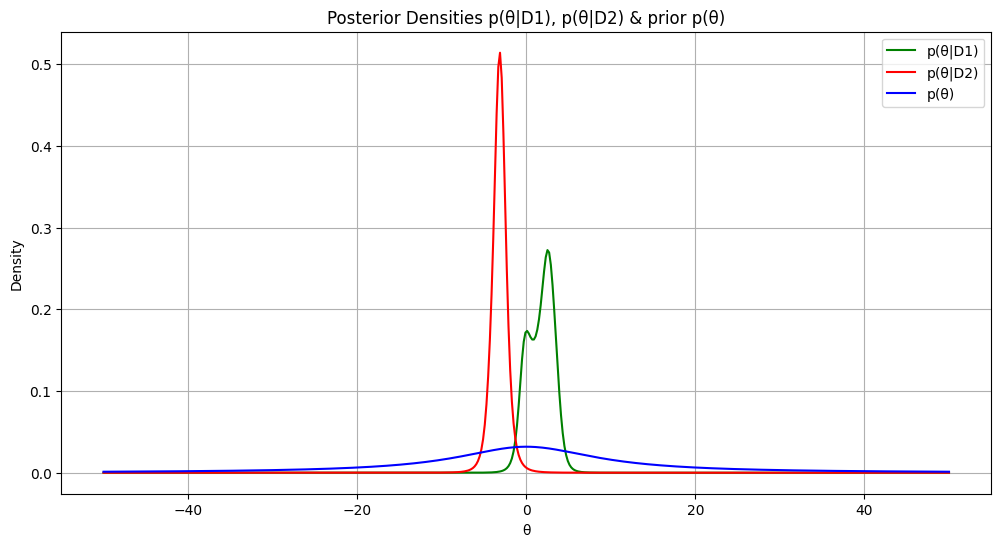

In [ ]:
class BayesClassifier:
    def __init__(self):
        self.posterior_theta1 = None #posterior density p(θ|D1)
        self.posterior_theta2 = None #posterior density p(θ|D2)
        self.ranging_theta = None

    def prior(self, theta): #prior distribution of θ
        return 1/(10*np.pi*(1 + (theta/10)**2))

    def likelihood(self, D, theta): #p(D|θ)
        return np.prod(1/(np.pi*(1 + (np.array(D)-theta)**2)))

    # def log_likelihood(self, D, theta):
    #     return np.sum(-np.log10(np.pi * (1 + (np.array(D) - theta) ** 2)))

    def log_likelihood(self, D, theta): #logp(D|θ)
        if (self.likelihood(D, theta) == 0):  #potential error handling
            return -np.inf  #-∞
        return np.log10(self.likelihood(D, theta))

    def posterior_density_theta(self, D, ranging_theta): #posterior density p(θ|D) for a range of θ
        all_likelihoods = np.array([np.exp(self.log_likelihood(D, theta)) for theta in ranging_theta])
        all_priors = self.prior(ranging_theta)
        arithmiths = all_likelihoods*all_priors
        paronomasths = np.trapz(arithmiths, ranging_theta) #integral
        return (arithmiths/paronomasths)

    def class_conditional_density_D(self, x, posterior_density_theta): #p(x|D)
        p_x_D = [(1/(np.pi*(1+(x-theta)**2))) * posterior_density_theta for theta, posterior_density_theta in zip(self.ranging_theta, posterior_density_theta)]
        return np.trapz(p_x_D, self.ranging_theta)

    def fit(self, D1, D2, ranging_theta): #training
        self.ranging_theta = ranging_theta
        self.posterior_theta1 = self.posterior_density_theta(D1, ranging_theta)
        self.posterior_theta2 = self.posterior_density_theta(D2, ranging_theta)

    def discr_value_B(self, x, prior1, prior2): #find value of discriminant function h(x)
        class_conditional_D1 = self.class_conditional_density_D(x, self.posterior_theta1) #p(x|D1)
        class_conditional_D2 = self.class_conditional_density_D(x, self.posterior_theta2) #p(x|D2)
        h = np.log10(class_conditional_D1) - np.log10(class_conditional_D2) + np.log10(prior1) - np.log10(prior2)
        return h

    def predict(self, h):
        if (h>0):
            return "ω1"
        else:
            return "ω2"

ranging_theta_B = np.linspace(-50, 50, 500)
classifierB = BayesClassifier() #make BayesClassifier object
classifierB.fit(D1, D2, ranging_theta_B) #train classifierB

#plot posterior densities p(θ|D1), p(θ|D2)
plt.figure(figsize=(12, 6))
plt.plot(ranging_theta_B, classifierB.posterior_theta1, label="p(θ|D1)", color="green")
plt.plot(ranging_theta_B, classifierB.posterior_theta2, label="p(θ|D2)", color="red")
plt.plot(ranging_theta_B, classifierB.prior(ranging_theta_B), label="p(θ)", color="blue")
plt.title("Posterior Densities p(θ|D1), p(θ|D2) & prior p(θ)")
plt.xlabel("θ")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

Παρατηρούμε ότι η prior κατανομή της $θ$ είναι πολύ απλωμένη και σχετικά επίπεδη που σημαίνει ότι δε δίνει κάποια σημαντική πληροφορία για το $θ$. Η επίδρασή της λοιπόν, όπως φαίνεται και από το διάγραμμα, στις posterior densities είναι μικρή. Οι $p(θ|D_1)$ και $p(θ|D_2)$ έχουν πολύ διαφορετική μορφή από την $p(θ)$, αλλά διαφέρουν πολύ και μεταξύ τους. Αυτό συμβαίνει επειδή τα δύο datasets $D_1$ και $D_2$ περιέχουν διαφορετικές πληροφορίες, οι οποίες επικρατούν έναντι της prior $p(θ)$, καθώς, όπως αναφέραμε, η $p(θ)$ δεν αποτελεί σημαντική συνιστώσα πληροφορίας. Έτσι, η κατανομή του $θ$ μετά την παρατήρηση των δειγμάτων του $D_1$ $p(θ|D_1)$ και η κατανομή του $θ$ μετά την παρατήρηση των δειγμάτων του $D_2$ $p(θ|D_2)$ επηρεάστηκαν περισσότερο από τα αντίστοιχα datasets παρά από την prior του $θ$.
Η $p(θ|D_2)$ βλέπουμε ότι είναι πολύ συγκεντρωμένη γύρω από την τιμή $θ=-2$ περίπου όπου παρουσιάζει ένα spike ολικού μεγίστου, γεγονός που δείχνει ότι τα δείγματα του $D_2$ δεν έχουν μεγάλο variance και άρα ότι το confidence για την τιμή του $θ$ είναι μεγάλο.
Η $p(θ|D_1)$ παρουσιάζει δύο τοπικά μέγιστα, δηλαδή δεν είναι τόσο συγκεντρωμένη και άρα τα δείγματα του $D_1$ έχουν περισσότερη διακύμανση γύρω από τη μέση τιμή του dataset, με αποτέλεσμα να προσφέρουν λιγότερη πληροφορία για το $θ$ σε σχέση με το $D_2$. Αυτό έχει ως αποτέλεσμα μια πιο απλωμένη παράσταση και επομένως μειωμένο confidence για την τιμή του $θ$. Για αυτόν τον λόγο και η $p(θ|D_1)$ δεν απέχει τόσο από την $p(θ)$ συγκριτικά με την $p(θ|D_2)$ (η πληροφορία που προσέφερε το $D_1$ δεν ήταν τόση καθοριστική για την τιμή του $θ$ όσο η πληροφορία που προσέφερε το $D_2$).

### 2. Ταξινομήστε τα δείγματα με τη συνάρτηση διάκρισης $$h(x) = logP(x|D_1) − logP(x|D_2) + logP(ω_1) − logP(ω_2)$$


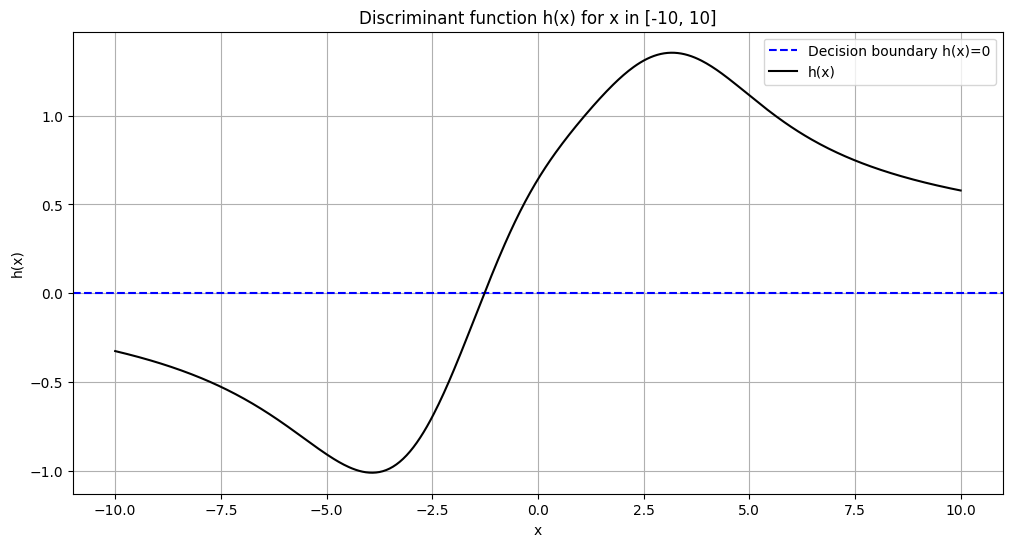

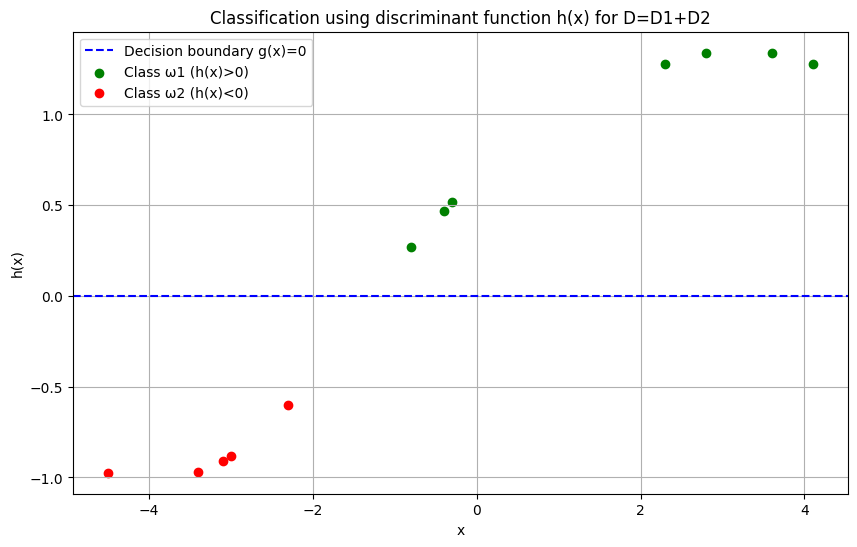

In a dataframe:
 Sample (x)  Discriminant h(x) Prediction
        2.8           1.339762         ω1
       -0.4           0.470532         ω1
       -0.8           0.268226         ω1
        2.3           1.279139         ω1
       -0.3           0.516184         ω1
        3.6           1.336051         ω1
        4.1           1.277287         ω1
       -4.5          -0.973774         ω2
       -3.4          -0.970439         ω2
       -3.1          -0.909153         ω2
       -3.0          -0.881802         ω2
       -2.3          -0.598697         ω2


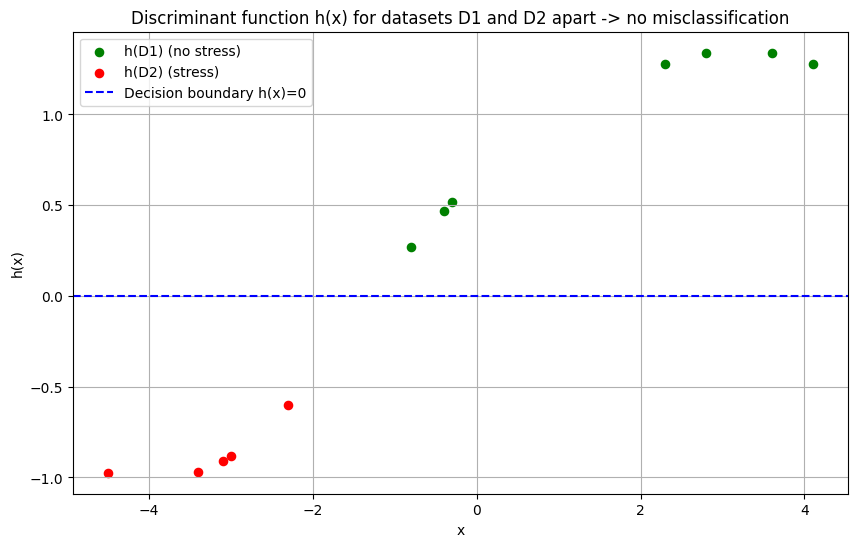

In [ ]:
#plot discriminant function h(x) for x in range [-10, 10]
h_values = [classifierB.discr_value_B(x, prior1, prior2) for x in range_x]

plt.figure(figsize=(12, 6))
plt.axhline(0, color="blue", linestyle="--", label="Decision boundary h(x)=0")
plt.plot(range_x, h_values, label="h(x)", color="black")
plt.title("Discriminant function h(x) for x in [-10, 10]")
plt.xlabel("x")
plt.ylabel("h(x)")
plt.legend()
plt.grid()
plt.show()


#h values for D (all x samples)
h_all = [classifierB.discr_value_B(x, prior1, prior2) for x in D]
h_all = np.array(h_all)

#g values for D1
h_D1 = [classifierB.discr_value_B(x, prior1, prior2) for x in D1]

#g values for D2
h_D2 = [classifierB.discr_value_B(x, prior1, prior2) for x in D2]


#classification results dictionary
predictions_B = [classifierB.predict(h) for h in h_all]


#plot h for D -> predictions
plt.figure(figsize=(10, 6))
plt.axhline(0, color="blue", linestyle="--", label="Decision boundary g(x)=0") #decision boundary g(x)=0

#take x and h(x) pairs for class ω1 and for ω2
plt.scatter(D[np.array(predictions_B) == "ω1"], h_all[np.array(predictions_B) == "ω1"], color="green", label="Class ω1 (h(x)>0)") #mark samples with prediction "ω1" (green) if h(x)>0
plt.scatter(D[np.array(predictions_B) == "ω2"], h_all[np.array(predictions_B) == "ω2"], color="red", label="Class ω2 (h(x)<0)") #mark samples with prediction "ω2" (red) where h(x)<0

plt.title("Classification using discriminant function h(x) for D=D1+D2")
plt.xlabel("x")
plt.ylabel("h(x)")
plt.legend()
plt.grid()
plt.show()

print("In a dataframe:")
results_B = {
    "Sample (x)": D,
    "Discriminant h(x)": h_all,
    "Prediction": predictions_B
}
df = pd.DataFrame(results_B)
print(df.to_string(index=False))


#plot h for D1 and D2 apart -> show misclassification errors
plt.figure(figsize=(10, 6))
#h(D1)
plt.scatter(D1, h_D1, color="green", label="h(D1) (no stress)", s=35)
#h(D2)
plt.scatter(D2, h_D2, color="red", label="h(D2) (stress)", s=35)

plt.axhline(0, color="blue", linestyle="--", label="Decision boundary h(x)=0") #decision boundary
plt.title("Discriminant function h(x) for datasets D1 and D2 apart -> no misclassification")
plt.xlabel("x")
plt.ylabel("h(x)")
plt.legend()
plt.grid(True)
plt.show()


Το όριο απόφασης σύμφωνα με τον κανόνα Bayes βρίσκεται (παρόμοια με το Α) στο: $$h(x)=0 $$
Παρατηρούμε ότι αν $h(x)>0$, τότε το δείγμα x ταξινομείται στην κλάση $ω_1$, ενώ αν $h(x)<0$, τότε το δείγμα x ταξινομείται στην κλάση $ω_2$. Όπως φαίνεται στο παραπάνω σχήμα ο Bayes classifier (classifierB) διαχωρίζει σωστά τα δύο σύνολα δεδομένων χωρίς να παρουσιάζει misclassification error σε αντίθεση με τον  MLE classifier (classifier) του Α που κάνει μία λάθος ταξινόμηση. Αυτό οφείλεται στο γεγονός ότι στην Bayesian εκτίμηση λαμβάνεται υπόψη περισσότερη πληροφορία σε σχέση με την Maximum Likelihood εκτίμηση. Πιο αναλυτικά στην MLE οι εκτιμήσεις των παραμέτρων $θ_1$ και $θ_2$ βασίζονται αποκλειστικά στα δεδομένα $D_1$ και $D_2$ αντίστοιχα και αγνοείται η prior πληροφορία που περιέχεται στην $p(θ)$ στην Bayesian εκτίμηση. Βέβαια εδώ η πληροφορία που παρέχει η $p(θ)$ είναι μικρή. Παρόλα αυτά δεν είναι ασήμαντη και εξακολουθεί να έχει μια επίδραση (έστω μικρή) στην εκτίμηση. Αυτή η έξτρα προϋπάρχουσα πληροφορία είναι αυτή που καθιστά την εκτίμηση πιο ακριβή και αποτρέπει το misclassification error που έκανε ο MLE classifier στο Α.

## Μέρος Γ

### 1η Ενότητα
Με τα 2 πρώτα χαρακτηριστικά των δειγμάτων για Iris setosa, Iris versicolor
και Iris virginica χρησιμοποιήστε τον DecisionTreeClassifier από την sklearn, εκπαιδεύεστε το 50% τυχαίων δειγμάτων του συνόλου και έπειτα ταξινομήστε το υπόλοιπο 50%.



#### 1. Τι ποσοστό σωστής ταξινόμησης λαμβάνετε; Ποιο βάθος δέντρου σας δίνει το καλύτερο ποσοστό;

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
Best accuracy: 0.6933
Best depth: 5


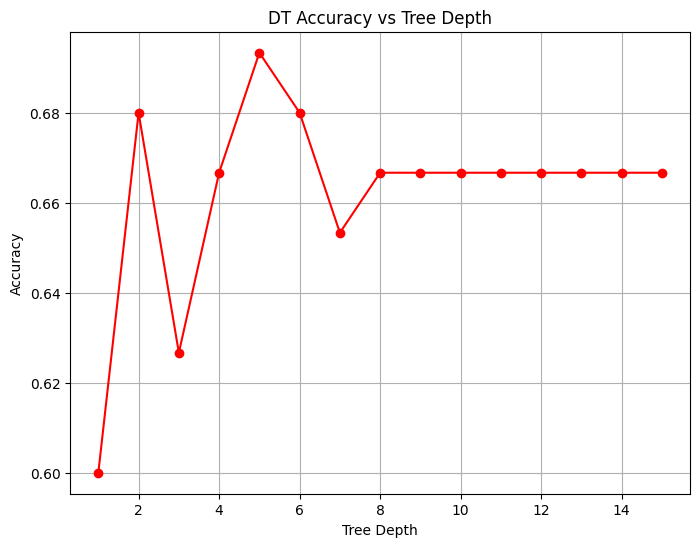

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap


#load the dataset
iris = load_iris()

#visualise data in dataframe
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.DataFrame(iris.data, columns=columns[:4])
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
print(iris_df)

#print(iris)
#print(iris.target)

X = iris.data[:, :2]  #use only the first 2 features (sepal length and width)
y = iris.target  #labels->species

#take only 50% of data for training (training: 50%, testing: 50%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y) #stratify=y to ensure balance of classes
#without stratify =>
#DT: Best Accuracy: 0.7867, Best depth: 3
#RF: Best accuracy: 0.8267, Best depth: 2
#implementation without stratify may yield results that do not depict the true model performance


#train DecisionTreeClassifier and find the best depth
dt_best_accuracy = 0
dt_best_depth = None
dt_best_model = None

dt_accuracy_per_depth = []  #contains the accuracy for each depth from 1 to 15

for depth in range(1, 16):  #try depths 1-15
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    dt_accuracy_per_depth.append(accuracy)

    if (accuracy>dt_best_accuracy): #update with best values
        dt_best_accuracy = accuracy
        dt_best_depth = depth
        dt_best_model = model

print(f"Best accuracy: {dt_best_accuracy:.4f}")
print(f"Best depth: {dt_best_depth}")

#plot accuracy vs depth
plt.figure(figsize=(8, 6))
plt.plot(range(1, 16), dt_accuracy_per_depth, marker="o", linestyle="-", color="red")
plt.title("DT Accuracy vs Tree Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


Ο DT classifier επιτυγχάνει το μεγαλύτερο ποσοστό σωστής ταξινόμησης, το οποίο είναι 69.33%, όταν το βάθος του δέντρου απόφασης είναι 5. Το βέλτιστο βάθος αυτό ισορροπεί το μοντέλο ανάμεσα σε underfitting και overfitting.

#### 2. Απεικονίστε τα όρια απόφασης του καλύτερου ταξινομητή

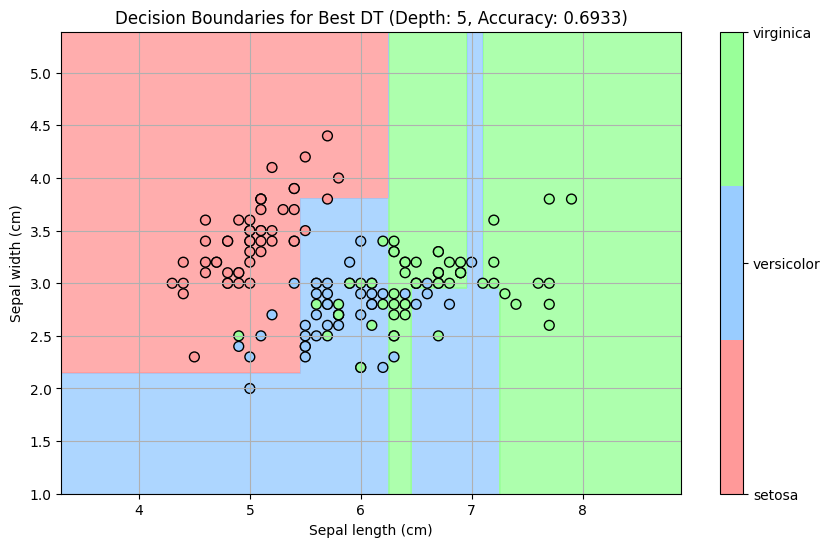

In [ ]:
import numpy as np

#mesh grid for feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  #sepal length range
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  #sepal width range
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))  #grid with step size 0.01

#predict class for each point in the grid
Z = dt_best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#custom colormap for the decision regions
custom_colormap = ListedColormap(["#FF9999", "#99CCFF", "#99FF99"])

#plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=custom_colormap)  # alpha -> 80% opaque

#scatterplot of the samples and the class they belong to
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=custom_colormap, s=50)

#colorbar with class names
colorbar = plt.colorbar(scatter, ticks=[0, 1, 2])  #for the 3 classes
colorbar.ax.set_yticklabels(iris.target_names)  #labels = species names

plt.title(f"Decision Boundaries for Best DT (Depth: {dt_best_depth}, Accuracy: {dt_best_accuracy:.4f})")
plt.xlabel(iris.feature_names[0].capitalize())
plt.ylabel(iris.feature_names[1].capitalize())
plt.grid(True)
plt.show()


### 2η Ενότητα
Δημιουργήστε ένα Random Forest ταξινομητή 100 δέντρων με την τεχνική Bootstrap.

#### 1. Τι ποσοστό σωστής ταξινόμησης λαμβάνετε; Ποιο βάθος δέντρου σας δίνει το καλύτερο ποσοστό;

Best accuracy: 0.7200
Best depth: 6


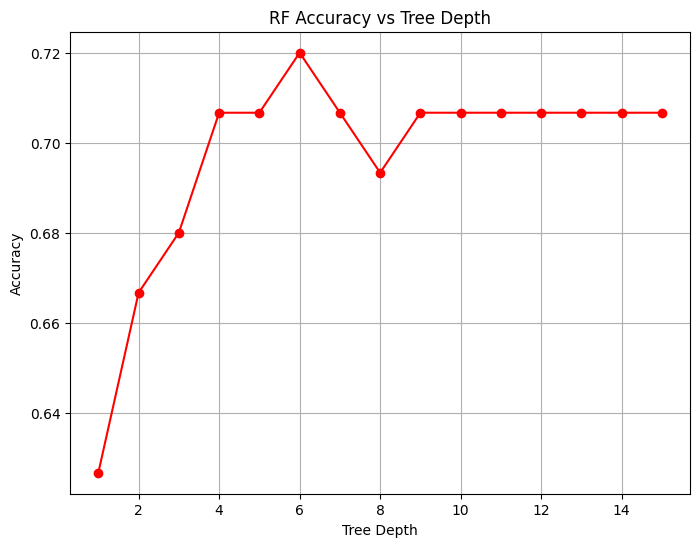

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#train RF with bootstrapping
def rf_bootstrap(X_train, X_test, y_train, y_test, depths, n_trees, max_samples):
    rf_best_accuracy = 0
    rf_best_depth = None
    rf_best_model = None
    rf_accuracy_per_depth = []

    #try different depths for the trees in the RF
    for depth in depths:
        #create RF containing 'n_trees' trees with max_depth=depth
        model = RandomForestClassifier(n_estimators=n_trees, max_depth=depth, random_state=42, bootstrap=True, max_samples=max_samples) #each one of the n_trees trees is trained with 50% (max_samples) of the X_train data
        model.fit(X_train, y_train) #train the RF

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        rf_accuracy_per_depth.append(accuracy) #save accuracy of RF for the different tree depths

        if (accuracy>rf_best_accuracy): #update with best values
            rf_best_accuracy = accuracy
            rf_best_depth = depth
            rf_best_model = model

    return rf_best_accuracy, rf_best_depth, rf_best_model, rf_accuracy_per_depth

#RF with training set X_train
depths = range(1, 16)  #try depths 1-15
rf_best_accuracy, rf_best_depth, rf_best_model, rf_accuracy_per_depth = rf_bootstrap(X_train, X_test, y_train, y_test, depths, 100, 0.5) #generate RF with 100 trees and bootstrapping 50% of X_train for each tree's training

print(f"Best accuracy: {rf_best_accuracy:.4f}")
print(f"Best depth: {rf_best_depth}")

#plot accuracy vs depth for RF
plt.figure(figsize=(8, 6))
plt.plot(depths, rf_accuracy_per_depth, marker="o", linestyle="-", color="red")
plt.title("RF Accuracy vs Tree Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


Ο RF classifier επιτυγχάνει το μεγαλύτερο ποσοστό σωστής ταξινόμησης, το οποίο είναι 72%, όταν το βάθος του εκάστοτε δέντρου απόφασης (δηλαδή και των 100) που χρησιμοποιεί είναι 6.

Η αύξηση της ακρίβειας από το 69.33% (απλός DT classifier βάθους 5) στο 72.00% (RF classifier 100 δέντρων βάθους 6 εκπαιδευμένα με Bootstrapping 50% του training set) είναι αναμενόμενη, αφού το μοντέλο RF λειτουργεί σαν committee (ensemble) από πολλαπλά δέντρα τα οποία είναι εκπαιδευμένα με διαφορετικά υποσύνολα του αρχικού training set (το Bootstrapping εισάγει διαφοροποίηση) και για να λάβει την τελική απόφαση (prediction) διεξάγει μια "ψηφοφορία" που μειώνει το variance και αυξάνει την ακρίβεια.

#### 2. Απεικονίστε τα όρια απόφασης του καλύτερου ταξινομητή. Τι παρατηρείτε σε σχέση με τον απλό ταξινομητή της προηγούμενης ενότητας;

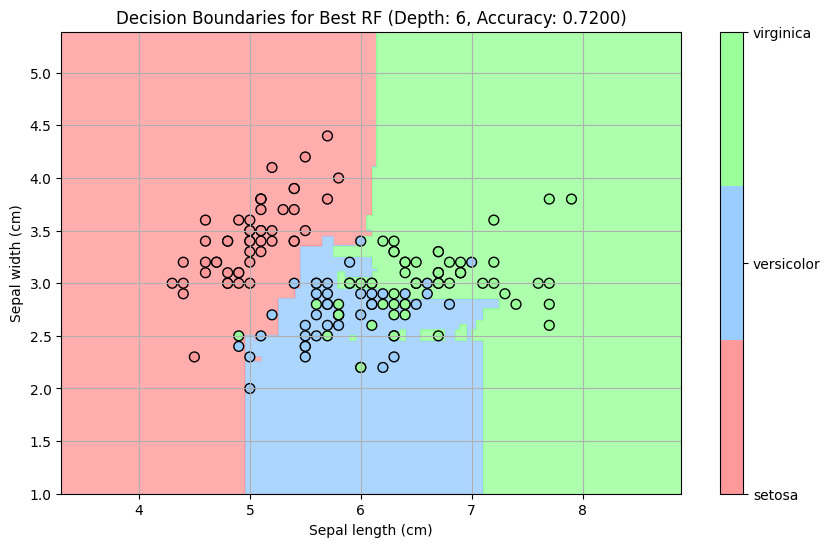

In [ ]:
#create mesh grid for feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  #sepal length range
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  #sepal width range
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))  #grid with step size 0.01

#predict class for each point in the grid using the best RF model
Z = rf_best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#create custom colormap for the decision regions
custom_colormap = ListedColormap(["#FF9999", "#99CCFF", "#99FF99"])

#plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=custom_colormap)  # alpha -> 80% opaque

#scatterplot of the samples and the class they belong to
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=custom_colormap, s=50)

#colorbar with class names
colorbar = plt.colorbar(scatter, ticks=[0, 1, 2])  #for the 3 classes
colorbar.ax.set_yticklabels(iris.target_names)  #labels = species names

plt.title(f"Decision Boundaries for Best RF (Depth: {rf_best_depth}, Accuracy: {rf_best_accuracy:.4f})")
plt.xlabel(iris.feature_names[0].capitalize())
plt.ylabel(iris.feature_names[1].capitalize())
plt.grid(True)
plt.show()


Τα όρια απόφασης του DT classifier είναι ορθογώνια (rectangular regions). Αυτό συμβαίνει, γιατί ο DT classifier διαχωρίζει διαδοχικά τον χώρο των χαρακτηριστικών (feature space) χρησιμοποιώντας άξονες δηλαδή τον χωρίζει σε περιοχές με βάση την τιμή ενός χαρακτηριστικού τη φορά. Για παράδειγμα μπορεί πρώτα να χωρίσει τα δεδομένα με βάση το αν το μήκος του σεπάλου είναι μεγαλύτερο ή μικρότερο από κάποια συγκεκριμένη τιμή και στη συνέχεια να χωρίσει τα δεδομένα με βάση το αν το πλάτος του σεπάλου είναι μεγαλύτερο από μια άλλη συγκεκριμένη τιμή. Αυτό δημιουργεί ορθογώνιες περιοχές και κατ' επέκταση ορθογώνια όρια απόφασης. Αυτό το σχήμα ορίων απόφασης είναι πολύ απλό και μπορεί δυνητικά να μην καταφέρει να αποτυπώσει περίπλοκες σχέσεις των δεδομένων (weak learner).


Από την άλλη, ο RF classifier είναι ένα σύνολο (ensemble) από πολλούς (εδώ 100) DT classifiers, ο καθένας από τους οποίους εκπαιδεύεται σε ένα διαφορετικό υποσύνολο των δεδομένων εκπαίδευσης (Bootstrap-κάθε δέντρο "μαθαίνει" διαφορετικά μοτίβα). Κάθε DT παράγει το δικό του όριο απόφασης (με τη μορφή rectangular regions). Στη συνέχεια, ο RF συνδυάζει τα αποτελέσματα από όλους τους DTs και πραγματοποιεί "ψηφοφορία" για την τελική απόφαση. Έτσι τα όρια απόφασης του RF είναι πιο περίπλοκα και, συνεπώς, πιο ευέλικτα και προσαρμοσμένα. Επομένως, έχοντας πιο σύνθετα όρια απόφασης, ο RF είναι σε θέση να γενικεύει καλύτερα και να αποτυπώνει αποδοτικότερα πιο περίπλοκες σχέσεις των δεδομένων.

#### 3. Πώς πιστεύετε ότι επηρεάζει το ποσοστό γ (ποσοστό Bootstrap) την απόδοση του αλγορίθμου; Δώστε παραδείγματα.

In [ ]:
gamma_10_rf_best_accuracy, gamma_10_rf_best_depth, gamma_10_rf_best_model, gamma_10_rf_accuracy_per_depth = rf_bootstrap(X_train, X_test, y_train, y_test, depths, 100, 0.1)  # Generate RF with 100 trees and bootstrapping 10% of X_train for each tree's training

print(f"Gamma 10%: ")
print(f"Best accuracy: {gamma_10_rf_best_accuracy:.4f}")
print(f"Best depth: {gamma_10_rf_best_depth}")


gamma_30_rf_best_accuracy, gamma_30_rf_best_depth, gamma_30_rf_best_model, gamma_30_rf_accuracy_per_depth = rf_bootstrap(X_train, X_test, y_train, y_test, depths, 100, 0.3)  # Generate RF with 100 trees and bootstrapping 30% of X_train for each tree's training

print(f"Gamma 30%: ")
print(f"Best accuracy: {gamma_30_rf_best_accuracy:.4f}")
print(f"Best small gamma depth: {gamma_30_rf_best_depth}")


gamma_40_rf_best_accuracy, gamma_40_rf_best_depth, gamma_40_rf_best_model, gamma_40_rf_accuracy_per_depth = rf_bootstrap(X_train, X_test, y_train, y_test, depths, 100, 0.4)  # Generate RF with 100 trees and bootstrapping 40% of X_train for each tree's training

print(f"Gamma 40%: ")
print(f"Best accuracy: {gamma_40_rf_best_accuracy:.4f}")
print(f"Best small gamma depth: {gamma_40_rf_best_depth}")


gamma_50_rf_best_accuracy, gamma_50_rf_best_depth, gamma_50_rf_best_model, gamma_50_rf_accuracy_per_depth = rf_bootstrap(X_train, X_test, y_train, y_test, depths, 100, 0.5)  # Generate RF with 100 trees and bootstrapping 50% of X_train for each tree's training

print(f"Gamma 50%: ")
print(f"Best accuracy: {gamma_50_rf_best_accuracy:.4f}")
print(f"Best small gamma depth: {gamma_50_rf_best_depth}")


gamma_70_rf_best_accuracy, gamma_70_rf_best_depth, gamma_70_rf_best_model, gamma_70_rf_accuracy_per_depth = rf_bootstrap(X_train, X_test, y_train, y_test, depths, 100, 0.7)  # Generate RF with 100 trees and bootstrapping 70% of X_train for each tree's training

print(f"Gamma 70%: ")
print(f"Best accuracy: {gamma_70_rf_best_accuracy:.4f}")
print(f"Best small gamma depth: {gamma_70_rf_best_depth}")


gamma_90_rf_best_accuracy, gamma_90_rf_best_depth, gamma_90_rf_best_model, gamma_90_rf_accuracy_per_depth = rf_bootstrap(X_train, X_test, y_train, y_test, depths, 100, 0.9)  # Generate RF with 100 trees and bootstrapping 90% of X_train for each tree's training

print(f"Gamma 90%: ")
print(f"Best accuracy: {gamma_90_rf_best_accuracy:.4f}")
print(f"Best small gamma depth: {gamma_90_rf_best_depth}")


Gamma 10%: 
Best accuracy: 0.6933
Best depth: 3
Gamma 30%: 
Best accuracy: 0.7200
Best small gamma depth: 5
Gamma 40%: 
Best accuracy: 0.7067
Best small gamma depth: 3
Gamma 50%: 
Best accuracy: 0.7200
Best small gamma depth: 6
Gamma 70%: 
Best accuracy: 0.7067
Best small gamma depth: 8
Gamma 90%: 
Best accuracy: 0.7067
Best small gamma depth: 3


Φαίνεται ότι το ποσοστό $γ$ των δεδομένων που χρησιμοποιούνται για την εκπαίδευση κάθε δέντρου στο Random Forest (RF) μέσω του Bootstrapping επηρεάζει σημαντικά την απόδοση του αλγορίθμου.

*   Για $γ=0.1%$ έχουμε ακρίβεια 69.33% με βάθος δέντρου 3
*   Για $γ=0.3%$ έχουμε ακρίβεια 72% με βάθος δέντρου 5
*   Για $γ=0.4%$ έχουμε ακρίβεια 70.67% με βάθος δέντρου 3
*   Για $γ=0.5%$ έχουμε ακρίβεια 72% με βάθος δέντρου 6
*   Για $γ=0.7%$ έχουμε ακρίβεια 70.67% με βάθος δέντρου 8
*   Για $γ=0.9%$ έχουμε ακρίβεια 70.67% με βάθος δέντρου 3

Παρατηρούμε ότι για χαμηλές τιμές $γ$ (10%), δηλαδή για μικρό αριθμό δειγμάτων για εκπαίδευση του εκάστοτε δέντρου, έχουμε **underfitting**. Με τόσα λίγα δεδομένα τα δέντρα είναι πολύ απλά και δεν καταφέρνουν να γενικεύσουν καλά και να αποτυπώσουν την πολυπλοκότητα και τις πιο σύνθετες σχέσεις των δεδομένων.

Για μεσαίες τιμές $γ$ (30%, 40%, 50%) το μοντέλο έχει περισσότερα δεδομένα για να εκπαιδευτεί και αυτό οδηγεί σε καλύτερη απόδοση (καλύτερη γενίκευση), αλλά και σε αύξηση στο βάθος των δέντρων που χρησιμοποιεί. Αυτό δείχνει ότι τα δέντρα είναι πιο ικανά να μάθουν περίπλοκες σχέσεις και έτσι να παραχθούν πιο ισχυρά μοντέλα. Δηλαδή η αύξηση του ποσοστού δεδομένων που δειγματοληπτούμε με Bootstrapping για να εκπαιδεύσουμε το εκάστοτε δέντρο οδηγεί σε καλύτερη απόδοση, μεγαλύτερη γενίκευση και καλύτερη αποτύπωση των σχέσεων των δεδομένων.

Παρόλα αυτά, η περαιτέρω αύξηση του $γ$ (70%, 90%) βλέπουμε ότι δε βελτιώνει την ακρίβεια (ίσα ίσα η ακρίβεια μειώνεται λίγο από 72% σε 70.67%) και οδηγεί πιθανότατα σε **overfitting** και δυνητικά σε υπερβολική εστίαση σε κάποια συγκεκριμένα features που είναι πιο σημαντικά (μειώνεται η ικανότητα γενίκευσης σε νέα δεδομένα).

Καταλήγουμε λοιπόν στο ότι η επιλογή του 30%-50% είναι η βέλτιστη έτσι ώστε να εξισορροπήσουμε ακρίβεια και γενίκευση.

